In [2]:
!pip install gymnasium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 965.4/965.4 kB 12.1 MB/s eta 0:00:00


In [3]:
import gymnasium as gym
import numpy as np
import random
import time

In [4]:
# env = gym.make('FrozenLake-v1', render_mode="ansi")
from IPython import display
from gymnasium.envs.toy_text.frozen_lake import FrozenLakeEnv
from gymnasium.envs.toy_text.taxi import TaxiEnv
env = FrozenLakeEnv(desc=None, map_name="4x4", render_mode="ansi", is_slippery=True)
# FrozenLake8x8
# env = FrozenLakeEnv(desc=None, map_name="8x8", render_mode="ansi", is_slippery=True)
# Taxi
# env = TaxiEnv()

In [5]:
# Initialize Q-value table randomly
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(q_table)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [6]:
# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

In [7]:
def q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []
    for episode in range(num_episodes):
        state, _ = env.reset()

        reward_episode = 0.0
        done = False
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate*episode)
        for step in range(num_steps_per_episode):
            exploration = random.uniform(0,1)
            if exploration < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            next_state, reward, terminated, truncated, _ = env.step(action)
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * np.max(q_table[next_state,:]))

            reward_episode += reward
            state = next_state

            if terminated or truncated:
                done = True

            if done:
                break
        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all

In [8]:
q_table, rewards_all = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

Episode 19999 finished


In [9]:
q_table

array([[0.51072249, 0.5114897 , 0.51051998, 0.50881049],
       [0.33022623, 0.24914237, 0.32453715, 0.49914408],
       [0.38994022, 0.37759041, 0.39133095, 0.47853126],
       [0.26921045, 0.30546813, 0.34460886, 0.46595954],
       [0.52332943, 0.33567141, 0.36880563, 0.36755901],
       [0.        , 0.        , 0.        , 0.        ],
       [0.19559667, 0.1226304 , 0.2738651 , 0.04465083],
       [0.        , 0.        , 0.        , 0.        ],
       [0.4624753 , 0.30740259, 0.27629735, 0.56026289],
       [0.45009426, 0.6085934 , 0.50813815, 0.46696908],
       [0.58552588, 0.33852621, 0.30382319, 0.30205403],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.49449711, 0.4711395 , 0.69534529, 0.4883619 ],
       [0.70854455, 0.79952691, 0.74315625, 0.75434967],
       [0.        , 0.        , 0.        , 0.        ]])

In [ ]:
sum(rewards_all)

12375.0

In [ ]:
sum(rewards_all[0:1000])

128.0

In [ ]:
sum(rewards_all[1000:2000])

344.0

In [ ]:
sum(rewards_all[2000:3000])

552.0

In [ ]:
sum(rewards_all[9000:10000])

684.0

In [ ]:
sum(rewards_all[19000:20000])

682.0

In [ ]:
from IPython import display as ipythondisplay
import matplotlib.pyplot as plt

In [ ]:
def play(env, q_table, render=False):
    state, _ = env.reset()
    total_reward = 0
    steps = 0
    done = False

    if render:
        plt.axis('off')

    while not done:
        action = np.argmax(q_table[state, :])
        next_state, reward, terminated, truncated, _ = env.step(action)
        total_reward += reward
        steps += 1
        if render:
            print(env.render())
            time.sleep(0.5)
            if not done:
                display.clear_output(wait=True)

        if terminated or truncated:
            done = True

        state = next_state

    return (total_reward, steps)

(1.0, 65)

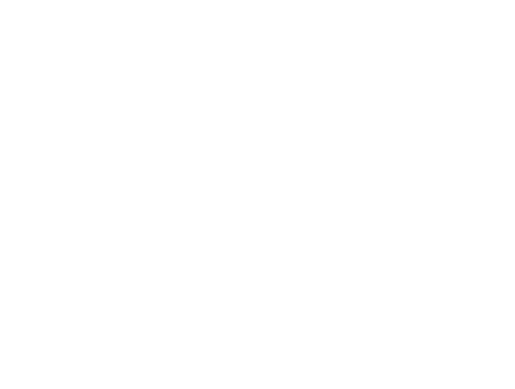

In [ ]:
play(env, q_table, True)

In [ ]:
def play_multiple_times(env, q_table, max_episodes):
    success = 0
    list_of_steps = []
    for i in range(max_episodes):
        total_reward, steps = play(env, q_table)

        if total_reward > 0:
            success += 1
            list_of_steps.append(steps)

    print(f'Number of successes: {success}/{max_episodes}')
    print(f'Average number of steps: {np.mean(list_of_steps)}')

In [ ]:
play_multiple_times(env, q_table, 1000)

Number of successes: 768/1000
Average number of steps: 42.92578125


In [ ]:
window = 100
average_y = []
for ind in range(len(rewards_all) - window + 1):
    average_y.append(np.mean(rewards_all[ind:ind+window]))

In [ ]:
for ind in range(window - 1):
    average_y.insert(0, np.nan)

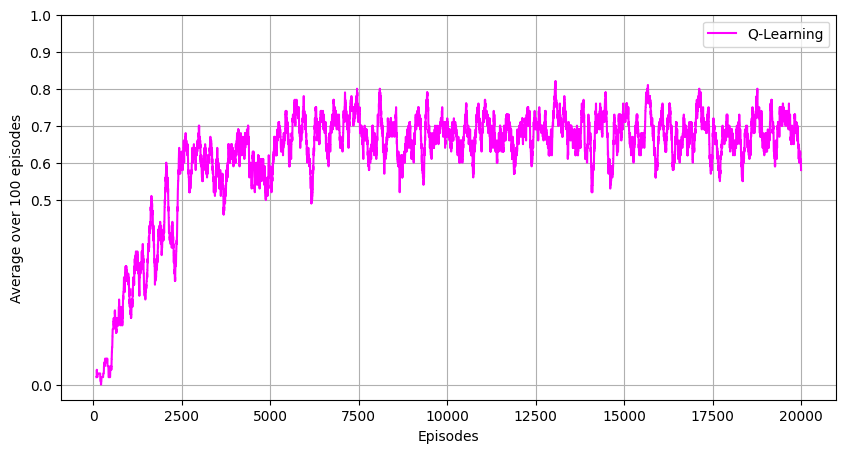

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(rewards_all)), average_y, color='magenta', label='Q-Learning')
plt.yticks([0, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.xlabel('Episodes')
plt.ylabel(f'Average over {window} episodes')
plt.legend()
plt.show()

In [10]:
import numpy as np
import random

def sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards_all = []

    for episode in range(num_episodes):
        out = env.reset()
        if isinstance(out, tuple):
            state = out[0]
        else:
            state = out
        state = int(state)  # Ép kiểu int cho chắc chắn

        # Tính epsilon giảm dần theo episode
        epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-epsilon_decay_rate * episode)

        # Chọn hành động đầu tiên theo epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            action = env.action_space.sample()
        else:
            action = np.argmax(q_table[state, :])

        reward_episode = 0.0
        done = False

        for step in range(num_steps_per_episode):
            out = env.step(action)
            if len(out) == 5:
                next_state, reward, terminated, truncated, _ = out
                done = terminated or truncated
            else:
                next_state, reward, done, _ = out
            next_state = int(next_state)

            # Chọn next_action theo epsilon-greedy policy dựa trên next_state
            if random.uniform(0, 1) < epsilon:
                next_action = env.action_space.sample()
            else:
                next_action = np.argmax(q_table[next_state, :])

            # Cập nhật Q theo công thức SARSA
            q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + gamma * q_table[next_state, next_action])

            reward_episode += reward

            # Cập nhật state, action cho bước tiếp theo
            state = next_state
            action = next_action

            if done:
                break

        rewards_all.append(reward_episode)
    print(f'Episode {episode} finished')
    return q_table, rewards_all


In [11]:
q_table, rewards_all = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)


Episode 19999 finished


In [12]:
q_table

array([[0.56135544, 0.47070075, 0.49302197, 0.47738138],
       [0.2053766 , 0.33031345, 0.27315363, 0.47533656],
       [0.35079541, 0.3488172 , 0.33552906, 0.42176239],
       [0.19514391, 0.13116149, 0.14941229, 0.40346016],
       [0.59367405, 0.39049955, 0.41880011, 0.31822548],
       [0.        , 0.        , 0.        , 0.        ],
       [0.20295072, 0.20117184, 0.38466582, 0.06332703],
       [0.        , 0.        , 0.        , 0.        ],
       [0.27957415, 0.52824665, 0.36766275, 0.66130851],
       [0.41222255, 0.72226183, 0.35729215, 0.39631875],
       [0.71209415, 0.49732538, 0.39751599, 0.17813306],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.3783509 , 0.54705731, 0.78571851, 0.48162719],
       [0.70526106, 0.90505942, 0.71331472, 0.75414523],
       [0.        , 0.        , 0.        , 0.        ]])

(7, 14)

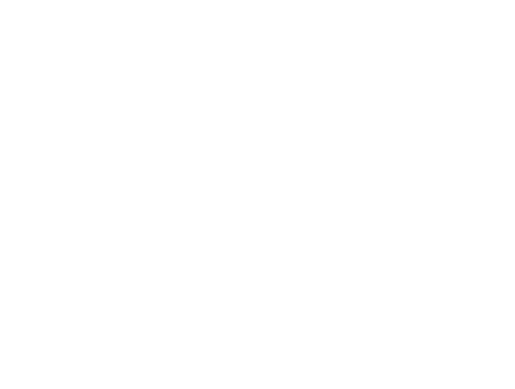

In [ ]:
play(env, q_table, True)

In [13]:
sum(rewards_all)

13142.0

In [14]:
sum(rewards_all[0:1000])

294.0

In [15]:
sum(rewards_all[1000:2000])

590.0

In [16]:
sum(rewards_all[2000:3000])

702.0

In [17]:
sum(rewards_all[9000:10000])

675.0

In [18]:
# Khởi tạo env
envs = {
    "FrozenLake4x4": FrozenLakeEnv(desc=None, map_name="4x4", render_mode="ansi", is_slippery=True),
    "FrozenLake8x8": FrozenLakeEnv(desc=None, map_name="8x8", render_mode="ansi", is_slippery=True),
    "Taxi": TaxiEnv()
}

# Hyperparameters
gamma = 0.99
learning_rate = 0.1
max_epsilon = 1.0
min_epsilon = 0.01
epsilon_decay_rate = 0.005

num_episodes = 20000
num_steps_per_episode = 100 # Each environment can have a different episode length

results = {}

for name, env in envs.items():
    if name == "FrozenLake8x8":
        num_steps_per_episode = 5000
    else:
        num_steps_per_episode = 100
    print(f"Running Q-Learning on {name} ...")
    q_table_q, rewards_q = q_learning(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

    print(f"Running SARSA on {name} ...")
    q_table_sarsa, rewards_sarsa = sarsa(env, num_episodes, num_steps_per_episode, learning_rate, gamma, max_epsilon, min_epsilon, epsilon_decay_rate)

    results[name] = {
        "q_learning": rewards_q,
        "sarsa": rewards_sarsa
    }


Running Q-Learning on FrozenLake4x4 ...
Episode 19999 finished
Running SARSA on FrozenLake4x4 ...
Episode 19999 finished
Running Q-Learning on FrozenLake8x8 ...
Episode 19999 finished
Running SARSA on FrozenLake8x8 ...
Episode 19999 finished
Running Q-Learning on Taxi ...
Episode 19999 finished
Running SARSA on Taxi ...
Episode 19999 finished


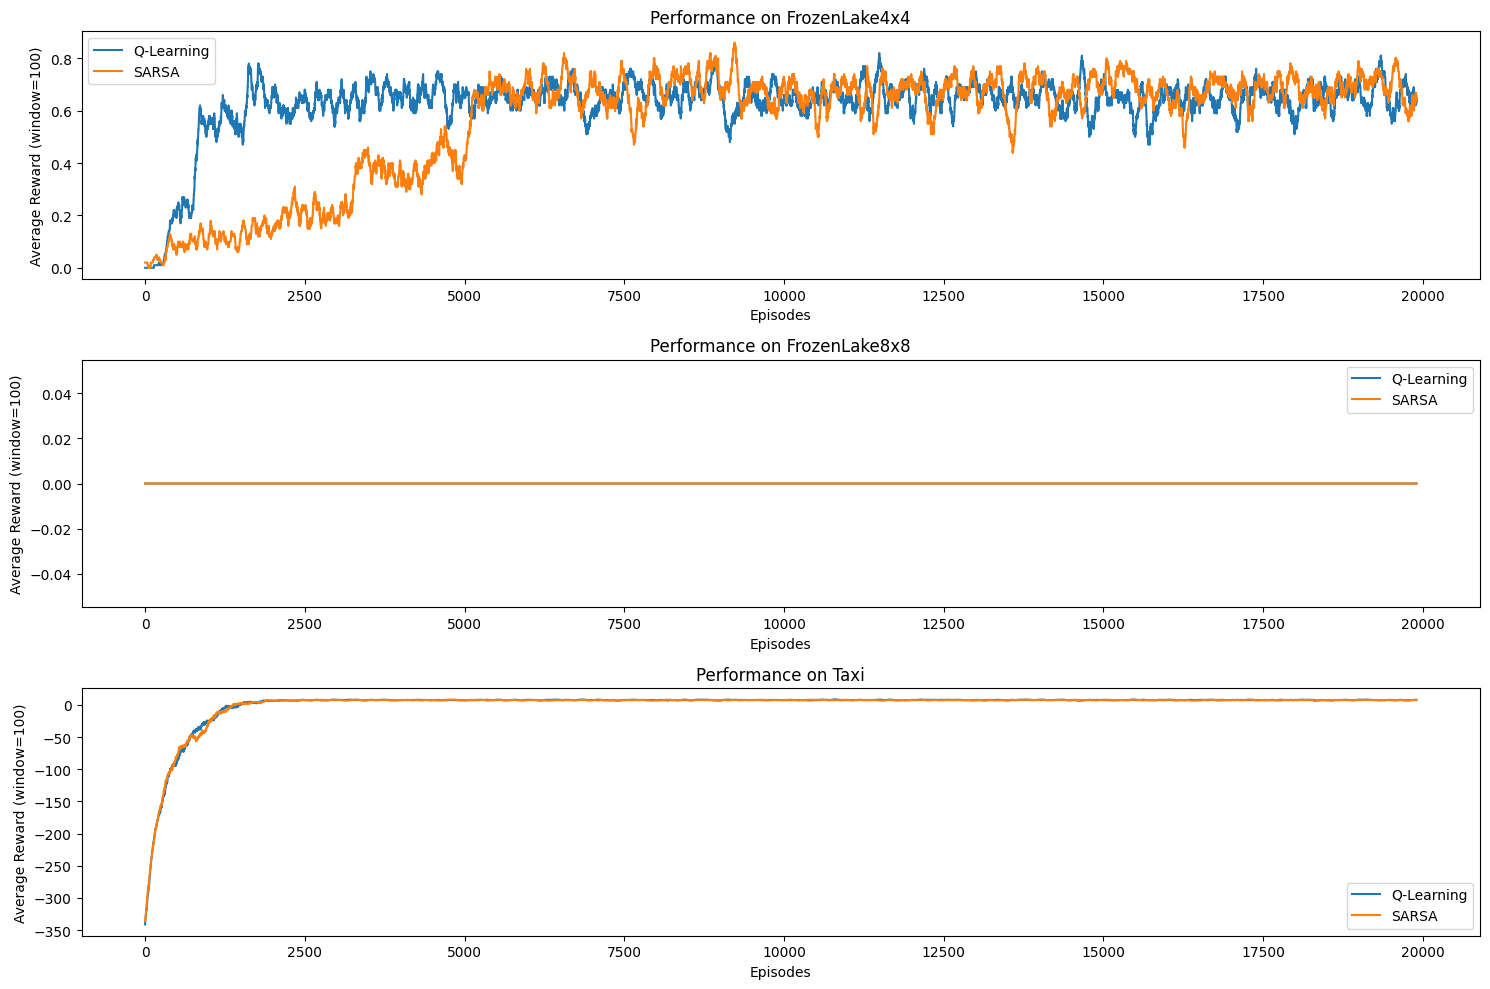

In [20]:
# Vẽ đồ thị so sánh
import matplotlib.pyplot as plt

plt.figure(figsize=(15,10))
for i, (name, res) in enumerate(results.items(), 1):
    plt.subplot(3,1,i)
    def smooth(x, w=100):
        return np.convolve(x, np.ones(w)/w, mode='valid')
    plt.plot(smooth(res["q_learning"]), label="Q-Learning")
    plt.plot(smooth(res["sarsa"]), label="SARSA")
    plt.title(f"Performance on {name}")
    plt.xlabel("Episodes")
    plt.ylabel("Average Reward (window=100)")
    plt.legend()
plt.tight_layout()
plt.show()

# Nhận xét
**1. FrozenLake4x4**
* Q-Learning và SARSA đều thể hiện khả năng học tốt, với reward trung bình tăng dần qua các tập.

* Q-Learning có xu hướng học nhanh và đạt reward cao hơn một chút so với SARSA.

* SARSA có đường học mượt mà hơn, ít biến động, thể hiện tính ổn định và an toàn hơn khi cập nhật policy (on-policy).

* Cả hai thuật toán hội tụ vào khoảng reward ~0.7 - 0.8, thể hiện chính sách tốt nhưng chưa hoàn toàn tối ưu do tính ngẫu nhiên của môi trường (is_slippery=True).


**2. FrozenLake8x8**
* Cả Q-Learning và SARSA không có tiến triển rõ rệt, reward trung bình duy trì gần bằng 0 trong toàn bộ quá trình.

* Điều này cho thấy môi trường lớn và phức tạp hơn nhiều, khiến agent khó học chính sách hiệu quả với số lượng tập và bước hiện tại.

* Nguyên nhân do môi trường có độ ngẫu nhiên cao (is_slippery=True).

**3. Taxi**
* Cả hai thuật toán đều học tốt, reward trung bình tăng dần từ giá trị rất thấp (âm) lên gần bằng 0 hoặc dương nhẹ.

* Q-Learning và SARSA có đường học khá tương đồng, tuy Q-Learning hơi nhanh hơn trong giai đoạn đầu.

* Kết quả cho thấy Taxi là môi trường có cấu trúc rõ ràng và phù hợp để cả hai thuật toán học hiệu quả.

